<a href="https://colab.research.google.com/github/spingtseng/Basic_ML/blob/main/ML02_Regression_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城鎮非零售業商用土地比例

CHAS：是否鄰近查爾斯河，1是鄰近，0是不鄰近

NOX：一氧化氮濃度（千萬分之一）

RM：住宅的平均房間數

AGE：自住且建於1940年前的房屋比例

DIS：到5個波士頓就業中心的加權距離

RAD：到高速公路的便捷度指數

TAX：每萬元的房產稅率

PTRATIO：城鎮學生教師比例

B： 1000(Bk − 0.63)2 其中Bk是城鎮中黑人比例

LSTAT：低收入人群比例

ans：自住房中位數價格，單位是千元

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
# print(boston.DESCR)
# → print(boston.DESCR) 可顯示該資料集詳細描述
# print(boston)
# print(boston.feature_names) 
# print(boston.target_names)
df = pd.DataFrame(boston["data"],
      columns=boston["feature_names"])
df["ans"] = boston["target"]
df

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
# [題目90, 題目10, 答案90, 答案10]
x_train, x_test, y_train, y_test = train_test_split(np.array(boston["data"]),
                             np.array(boston["target"]),
                             test_size=0.1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train, y_train)

[Text(418.5, 713.475, 'RM <= 6.941\nmse = 83.5\nsamples = 455\nvalue = 22.561'),
 Text(209.25, 509.625, 'LSTAT <= 14.395\nmse = 38.561\nsamples = 383\nvalue = 19.869'),
 Text(104.625, 305.775, 'DIS <= 1.385\nmse = 23.538\nsamples = 227\nvalue = 23.231'),
 Text(52.3125, 101.92499999999995, '\n  (...)  \n'),
 Text(156.9375, 101.92499999999995, '\n  (...)  \n'),
 Text(313.875, 305.775, 'CRIM <= 6.992\nmse = 20.032\nsamples = 156\nvalue = 14.976'),
 Text(261.5625, 101.92499999999995, '\n  (...)  \n'),
 Text(366.1875, 101.92499999999995, '\n  (...)  \n'),
 Text(627.75, 509.625, 'RM <= 7.437\nmse = 78.991\nsamples = 72\nvalue = 36.879'),
 Text(523.125, 305.775, 'CRIM <= 7.393\nmse = 42.191\nsamples = 45\nvalue = 32.091'),
 Text(470.8125, 101.92499999999995, '\n  (...)  \n'),
 Text(575.4375, 101.92499999999995, '\n  (...)  \n'),
 Text(732.375, 305.775, 'TAX <= 534.5\nmse = 38.434\nsamples = 27\nvalue = 44.859'),
 Text(680.0625, 101.92499999999995, '\n  (...)  \n'),
 Text(784.6875, 101.9249999

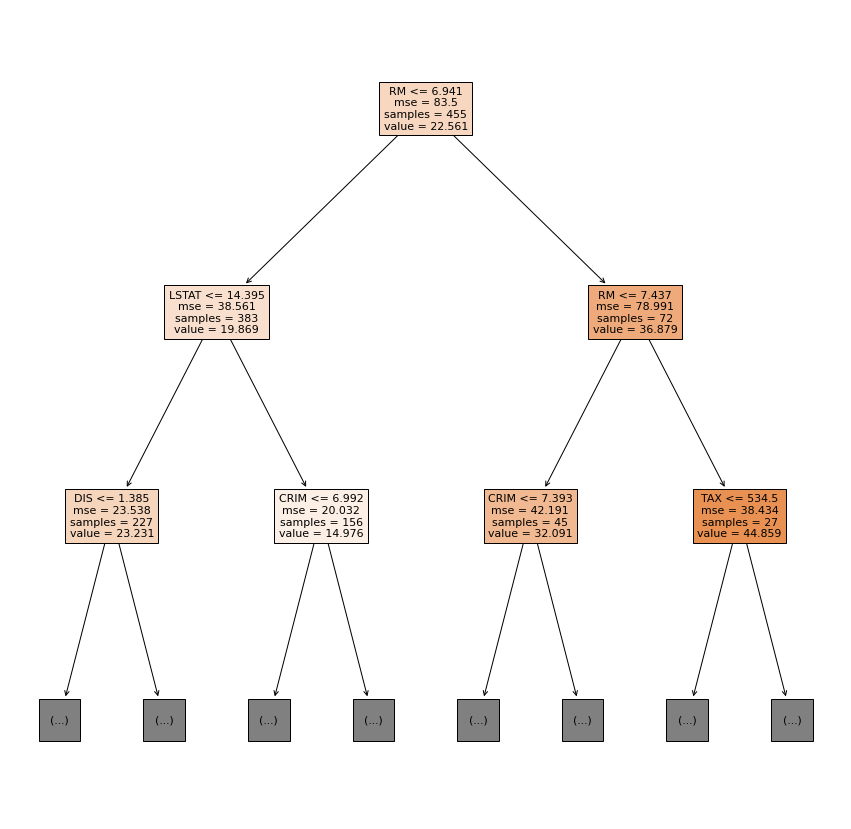

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#plt.figure() 顯示大小
plt.figure(figsize=(15, 15))
#feature_names 分類原因 class_names分類名稱 filled 上色
plot_tree(reg, 
     feature_names=boston["feature_names"], 
     max_depth = 2,
     filled=True)

In [ ]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.8384641732054879

Ｍean Squared Error 分佈範圍 (誤差的機率)
決策樹 分佈到 MSE = 0 為止 --> 平均平方誤差(跟平均的平方 的誤差)

$\frac{1}{n} \sum \left( P_i - 該節點的區段的平均房價  \right)＾2 $

分類問題的度量標準 -> accuracy_score 分類正確率

迴歸問題的度量標準 -> $r^2 score$ | MAE | RMSE

- 對象：x_test、y_test
- $pre_i$: 每筆資料預測值
- MAE = $\frac{1}{n} \sum \mid pre_i - y\_test_i \mid $   *A:Absolute
- MSE = $\frac{1}{n} \sum \left( pre_i - y\_test_i  \right)^2 $
- RMSE = $\sqrt{\frac{1}{n} \sum \left( pre_i - y\_test_i  \right)^2}$
  =$\sqrt{MSE}$

MAE絕對值 vs. RMSE平方再開根號    MSE平方, 會把本來較大的預測拉得更大 ==>誤差更擴大

正確  0 | 0
______________
預測  5 | 5      MAE=5, MSE=5, RMSE=5
______________
預測  1 | 9      MAE=5, MSE=$\sqrt{\frac{1}{n}\left(1^2+9^2 \right)} = \sqrt{82\div 2} = \sqrt{41} \approx 6. \cdots $
______________
只可用於想知道差距多少的 確切數字, 但無法比較不同地區
ex:   單位：新台幣NTD
- 紐約NY  RMSE=  1,000  均價: 1萬
- Taipei RMSE=100,000  均價: 1億
- => 雖然RMSE相差很大, 但是均價完全不一樣, 無法比較

=> 所以要有統一單位的度量標準(用%)
- 認真猜的誤差 $a = \frac{1}{n} \sum \left( pre_i - y\_test_i  \right)^2 $
- 瞎猜的誤差 $b = \frac{1}{n} \sum \left( y\_test\left(平均\right) - y\_test_i  \right)^2 $
- 猜很爛        $\Uparrow\Uparrow\Uparrow\Uparrow\Uparrow$ 每個都猜平均

則$\frac{a}{b}$ (極端值)

0 -> $a = 0$ : 猜超準: 預測全都正確

1 -> $a = b$ : 每一個預測都＝平均值

$0 \leq \frac{a}{b} \leq 1$  (不考慮猜更爛的情況)
      
好-------->爛
- 做反向
  $0 \leq 1 - \frac{a}{b} \leq 1$
          爛----------->好
==> $\color{lime}{\fbox{$r^2$  score}}$

1 -> $a = 0$ : 猜超準: 預測全都正確

0 -> $a = b$ : 每一個預測都＝平均值

${\tt {0.5以上就是叫好的迴歸計算}}$

- ${\tt {classification: 80\%\uparrow}} 較佳$
- ${\tt {regression: 0.5\uparrow 較佳}}$

前五樣本準確率[https://www.cnblogs.com/hutao722/p/9625591.html]

Top-5 Accuracy: 是指排名前五的類別, 其中一個跟實際结果一樣的準確率

Top-1 Accuracy: 是指排名第一的那個類別, 與實際的結果一樣的準確率


